In [19]:
import pandas as pd

data = pd.read_csv("Earnings Manipulation 220.csv")

data.head()


,Company Name,Year Ending,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,MANIPULATOR
0,1,3/31/2014,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,1
1,2,3/31/2009,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,1
2,3,3/31/2008,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,1
3,4,3/31/2014,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,1
4,5,3/31/2010,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,1


In [20]:
print(data.shape)


(220, 11)


In [21]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  220 non-null    int64  
 1   Year Ending   220 non-null    object 
 2   DSRI          220 non-null    float64
 3   GMI           220 non-null    float64
 4   AQI           220 non-null    float64
 5   SGI           220 non-null    float64
 6   DEPI          220 non-null    float64
 7   SGAI          220 non-null    float64
 8   ACCR          220 non-null    float64
 9   LEVI          220 non-null    float64
 10  MANIPULATOR   220 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 19.0+ KB
None


In [22]:
from sklearn.model_selection import train_test_split


X = data.drop(columns=['Company Name', 'Year Ending', 'MANIPULATOR'])
y = data['MANIPULATOR']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


positives_in_test = sum(y_test)

positives_in_test


8

In [24]:
from sklearn.utils import resample

# Combine the training data back together
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes
majority = train_data[train_data.MANIPULATOR == 0]
minority = train_data[train_data.MANIPULATOR == 1]

# Upsample the minority class
minority_upsampled = resample(minority, 
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=42) # reproducible results

# Combine majority and upsampled minority
upsampled = pd.concat([majority, minority_upsampled])

# Separate features and target
X_train_balanced = upsampled.drop(columns=['MANIPULATOR'])
y_train_balanced = upsampled['MANIPULATOR']

# Check the distribution
y_train_balanced.value_counts()


1    145
0    145
Name: MANIPULATOR, dtype: int64

# Building and Evaluating Models

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the model
nb = GaussianNB()

# Define the parameter grid (if applicable)
param_grid_nb = {}

# Set up GridSearchCV
grid_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=5, scoring='f1')

# Train the model
grid_nb.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred_nb = grid_nb.predict(X_test)

# Evaluate the model
print("Naïve Bayes Model Performance:")
print(classification_report(y_test, y_pred_nb))


Naïve Bayes Model Performance:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        36
           1       0.60      0.38      0.46         8

    accuracy                           0.84        44
   macro avg       0.74      0.66      0.68        44
weighted avg       0.82      0.84      0.83        44



In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define the models
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Define parameter grids for each model
param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

# Grid search and evaluation for each model
for model_name, model in models.items():
    grid = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='f1')
    grid.fit(X_train_balanced, y_train_balanced)
    y_pred = grid.predict(X_test)
    print(f"{model_name} Model Performance:")
    print(classification_report(y_test, y_pred))


KNN Model Performance:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.43      0.38      0.40         8

    accuracy                           0.80        44
   macro avg       0.65      0.63      0.64        44
weighted avg       0.79      0.80      0.79        44

SVM Model Performance:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.75      0.75      0.75         8

    accuracy                           0.91        44
   macro avg       0.85      0.85      0.85        44
weighted avg       0.91      0.91      0.91        44

Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.71      0.62      0.67         8

    accuracy                           0.89        44
   macro avg       0.82      0.78      0.80

Feature ranking:
1. feature LEVI (0.17029310072757262)
2. feature SGI (0.1649950626575841)
3. feature DSRI (0.15038026638905277)
4. feature ACCR (0.14807958779608402)
5. feature SGAI (0.133119833300162)
6. feature GMI (0.0925550511397613)
7. feature AQI (0.07978847222402681)
8. feature DEPI (0.06078862576575642)


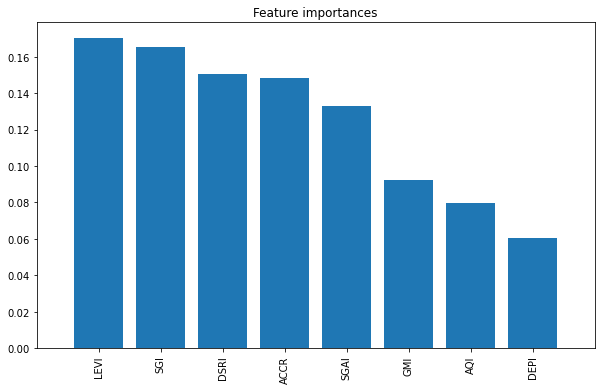

In [29]:
#Using RandomForest for feature importance:
import numpy as np

# Train the Random Forest model on the balanced dataset
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Get feature importances
importances = rf.feature_importances_
features = X_train_balanced.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")

for f in range(X_train_balanced.shape[1]):
    print(f"{f + 1}. feature {features[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train_balanced.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_balanced.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_train_balanced.shape[1]])
plt.show()


In [30]:
#Downsampling 

# Separate majority and minority classes
majority_down = train_data[train_data.MANIPULATOR == 0]
minority_down = train_data[train_data.MANIPULATOR == 1]

# Downsample the majority class
majority_downsampled = resample(majority_down, 
                                replace=False,    # sample without replacement
                                n_samples=len(minority_down),  # to match minority class
                                random_state=42)  # reproducible results

# Combine downsampled majority and minority
downsampled = pd.concat([majority_downsampled, minority_down])

# Separate features and target
X_train_downsampled = downsampled.drop(columns=['MANIPULATOR'])
y_train_downsampled = downsampled['MANIPULATOR']

# Check the distribution
y_train_downsampled.value_counts()


1    31
0    31
Name: MANIPULATOR, dtype: int64

In [31]:
#Compare Upsampling and Downsampling Techniques

# Define the models again for downsampled data
models = {
    'Naïve Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Define parameter grids for each model again
param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

# Grid search and evaluation for each model on downsampled data
for model_name, model in models.items():
    grid = GridSearchCV(estimator=model, param_grid=param_grids.get(model_name, {}), cv=5, scoring='f1')
    grid.fit(X_train_downsampled, y_train_downsampled)
    y_pred = grid.predict(X_test)
    print(f"{model_name} Model Performance (Downsampled):")
    print(classification_report(y_test, y_pred))


Naïve Bayes Model Performance (Downsampled):
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.50      0.38      0.43         8

    accuracy                           0.82        44
   macro avg       0.68      0.65      0.66        44
weighted avg       0.80      0.82      0.81        44

KNN Model Performance (Downsampled):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        36
           1       0.38      0.38      0.38         8

    accuracy                           0.77        44
   macro avg       0.62      0.62      0.62        44
weighted avg       0.77      0.77      0.77        44

SVM Model Performance (Downsampled):
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.83      0.62      0.71         8

    accuracy                           0.91        44
   macro 

In [32]:
# Reporting the best model
best_model = 'SVM'
print(f"The best model based on downsampling results is {best_model} with the highest F1-score and accuracy.")


The best model based on downsampling results is SVM with the highest F1-score and accuracy.


In [ ]:
##Consider from here 

